In [3]:
'''
교차검정(cross validation)
'''

import pandas as pd
from sklearn.model_selection import cross_validate# cross validation 
from sklearn.ensemble import RandomForestClassifier # RM
import matplotlib.pyplot as plt # 중요변수 시각화 

iris = pd.read_csv('C:/Users/hyebin/Desktop/Python_ML//data/iris.csv')


cols = list(iris.columns)

x_data = iris[cols[:4]] # 1~4칼럼 
y_data = iris[cols[-1]] # 5번째 칼럼
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# 1. model 생성 
rfc = RandomForestClassifier()
model = rfc.fit(x_data, y_data)


# 2. 교차검정 : cv=5(30,30,30,30,30)
score = cross_validate(model, x_data, y_data, cv=5)
print(score,"\n")
print(score['test_score'])

{'fit_time': array([0.08001781, 0.08001781, 0.08001804, 0.08001804, 0.08001804]), 'score_time': array([0.00500154, 0.00600123, 0.00600147, 0.00600123, 0.00600171]), 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])} 

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [6]:
# 각 모델의 산술평균 
print(score['test_score'].mean())

0.96


In [7]:
# 3. 중요변수 시각화
print("특징 중요도 : \n{}".format(model.feature_importances_))
# [해설] 13개 x변수의 중요점수 -> x변수 이름 확인 불가  

특징 중요도 : 
[0.10762158 0.02292933 0.42456257 0.44488652]


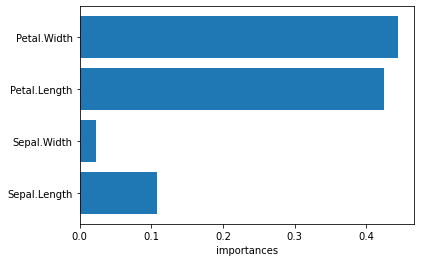

In [8]:
# 중요 변수 시각화
def plot_feature_importances(model):
    x_size = x_data.shape[1] # 13 : x변수 개수 
    # 가로막대 차트 
    plt.barh(range(x_size), model.feature_importances_) # y, width(x)
    # y 축눈금
    plt.yticks(range(x_size), cols[:4]) # size, name 
    plt.xlabel("importances")
    plt.show()

plot_feature_importances(model)

In [9]:
# 2. model 생성
obj = RandomForestClassifier()  
model= obj.fit(x_data,y_data) # raw dataset
print(model)

RandomForestClassifier()


In [10]:
# 3. model 평가 : 5겹(5등분 쪼개서 그중 하나를 테스트하고 나머지는 트레이닝 다섯번걸쳐서 하겠ㄷ)
score = cross_validate(model,x_data,y_data,cv=5) # 5겹 교차검정
print(score)

{'fit_time': array([0.08701038, 0.08001828, 0.07952213, 0.08001781, 0.08001709]), 'score_time': array([0.00600147, 0.006001  , 0.00600147, 0.00500107, 0.00600195]), 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}


In [11]:
test_score = score["test_score"] # key를 통해 value값을 반환
print(test_score)

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [12]:
# 각점수의대한 산술평균
acc=score["test_score"].mean()
print(acc) 

0.96


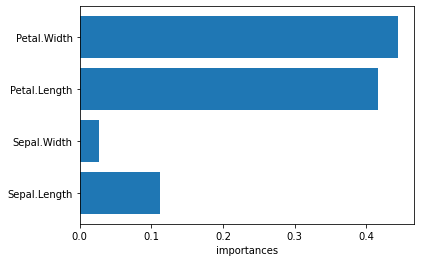

In [14]:
# 4. 중요변수 시각화
col_names = list(iris.columns)
def plot_featur_impo(model):
    x_size = 4 # 13(x변수 개수)
    # 가로막대차트
    plt.barh(range(x_size),model.feature_importances_)# (y축,x축(width))
    # y 축눈금
    plt.yticks(range(x_size),col_names[:4])
    plt.xlabel("importances")
    plt.show()

plot_featur_impo(model)
